In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import median, mean
import warnings
warnings.filterwarnings('ignore')

## **DataFrame**

In [7]:
deportes_url = "https://raw.githubusercontent.com/lihkirun/AppliedStatisticMS/main/DataVisualizationRPython/Lectures/Python/PythonDataSets/athlete_events.csv"

In [8]:
deportes_df = pd.read_csv(deportes_url)
deportes_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [9]:
deportes_df.describe(include=object)

,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal
count,271116,271116,271116,271116,271116,271116,271116,271116,271116,39783
unique,134732,2,1184,230,51,2,42,66,765,3
top,Robert Tait McKenzie,M,United States,USA,2000 Summer,Summer,London,Athletics,Football Men's Football,Gold
freq,58,196594,17847,18853,13821,222552,22426,38624,5733,13372


## Pasos previos

Para la realización de los 3 incisos, filtramos el DataFrame **deportes_df** con el fin de trabajar únicamente con los registros relacionados con los jugadores que participaron durante el año 2016 y se ganaron una medalla.

In [10]:
medallas_2016 = deportes_df.loc[(deportes_df['Year']== 2016) & (deportes_df['Medal'].notna())]
medallas_2016.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
161,65,Patimat Abakarova,F,21.0,165.0,49.0,Azerbaijan,AZE,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze
175,73,Luc Abalo,M,31.0,182.0,86.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Silver
450,250,Saeid Morad Abdevali,M,26.0,170.0,80.0,Iran,IRI,2016 Summer,2016,Summer,Rio de Janeiro,Wrestling,"Wrestling Men's Middleweight, Greco-Roman",Bronze
794,455,Denis Mikhaylovich Ablyazin,M,24.0,161.0,62.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Team All-Around,Silver


Seguido de esto, haciendo uso de la nueva base de datos creada que lleva por nombre **medallas_2016**, contamos cuántas medallas ganó en total cada deporte y lo ordenamos de mayor a menor (por cantidad de medallas).
Para cada uno de los procesos mencionados anteriormente, hacemos uso de las funciones `count()` y `sort.values()`, respectivamente.
Como resultado, obtuvimos que el deporte con mayor cantidad de medallas es Atletismo, el cual obtuvo un total de 192 medallas durante el año de interés (2016).

In [11]:
medallas_deportes = medallas_2016.groupby('Sport')['Medal'].count().reset_index()
print(medallas_deportes) #cantidad total de medallas por deporte

                    Sport  Medal
0                 Archery     24
1               Athletics    192
2               Badminton     24
3              Basketball     72
4        Beach Volleyball     12
5                  Boxing     51
6                Canoeing     82
7                 Cycling     84
8                  Diving     36
9           Equestrianism     45
10                Fencing     65
11               Football    106
12                   Golf      6
13             Gymnastics     66
14               Handball     89
15                 Hockey     99
16                   Judo     56
17      Modern Pentathlon      6
18    Rhythmic Gymnastics     18
19                 Rowing    144
20           Rugby Sevens     74
21                Sailing     45
22               Shooting     45
23               Swimming    191
24  Synchronized Swimming     32
25           Table Tennis     24
26              Taekwondo     32
27                 Tennis     24
28           Trampolining      6
29        

In [12]:
medallas_deportes = medallas_deportes.sort_values(by='Medal', ascending=False)
medallas_deportes.head()

,Sport,Medal
1,Athletics,192
23,Swimming,191
19,Rowing,144
11,Football,106
15,Hockey,99


En este caso, los deportes más importantes son aquellos con mayor cantidad de medallas. Por ende, dado que el DataFrame **medallas_deportes** nos brinda la información ordenada descendentemente, usamos `head(5)`para quedarnos solamente con sus primeros cinco valores. Es decir, los deportes con más medallas son : Atletismo, Natación, Remo, Fútbol y Hockey.
Además, filtramos **medallas_2016**, de tal manera que solo se nos muestren los registros de los deportes mencionados.


In [13]:
medallas_5 = medallas_deportes.head(5)
print(medallas_5)

        Sport  Medal
1   Athletics    192
23   Swimming    191
19     Rowing    144
11   Football    106
15     Hockey     99


In [14]:
deportes_5=medallas_5['Sport']
deportes_dff = medallas_2016[medallas_2016['Sport'].isin(deportes_5)]
deportes_dff.head() #Solo contiene registros de los 5 deportes principales

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
814,465,"Matthew ""Matt"" Abood",M,30.0,197.0,92.0,Australia,AUS,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Bronze
1228,690,Chantal Achterberg,F,31.0,172.0,72.0,Netherlands,NED,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Quadruple Sculls,Silver
1529,846,Valerie Kasanita Adams-Vili (-Price),F,31.0,193.0,120.0,New Zealand,NZL,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's Shot Put,Silver
1847,1017,Nathan Ghar-Jun Adrian,M,27.0,198.0,100.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 50 metres Freestyle,Bronze


## Inciso 1
# Genere un gráfico que indique el número de medallas concedidas en cada uno de los cinco principales deportes en 2016.

Diagrama de barras para mostrar la cantidad de medallas que tiene cada unos de los cinco deportes.

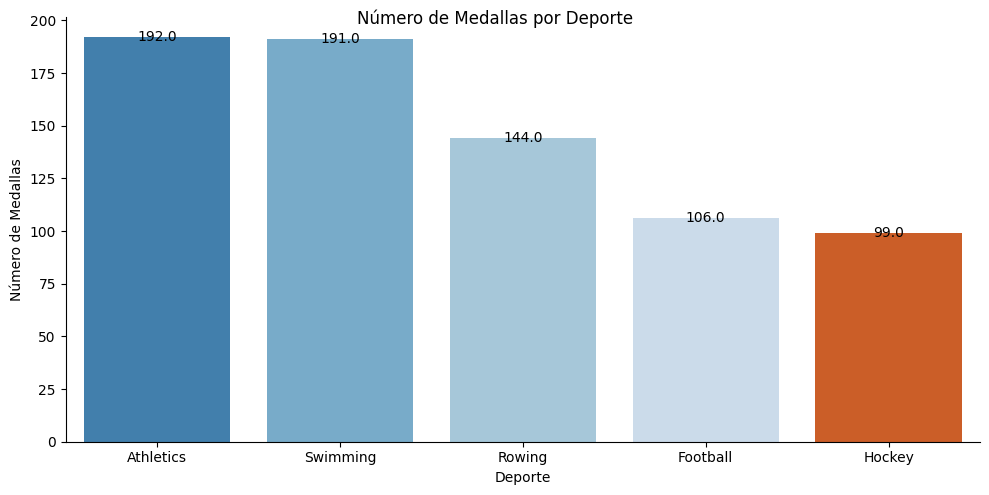

In [15]:
ax = sns.catplot(data=medallas_5, x="Sport", y="Medal", kind="bar", aspect=2, palette = "tab20c")

ax.set_axis_labels("Deporte", "Número de Medallas")
ax.fig.suptitle("Número de Medallas por Deporte")

for p in ax.ax.patches:
    height = p.get_height()
    ax.ax.text(p.get_x() + p.get_width() / 2., height, f'{height}', ha="center", va="center")

## Inciso 2
# Trace un gráfico que represente la distribución de la edad de los ganadores de medallas en los cinco principales deportes en 2016

Tomando la información contenida en `deportes_dff`, se crea un histograma para mostrar la frecuencia de los valores dentro de la variable **Age**.

[Text(0.5, 1.0, 'Distribución de la edad de ganadores de medallas'),
 Text(0.5, 0, 'Edad'),
 Text(0, 0.5, 'Frecuencia')]

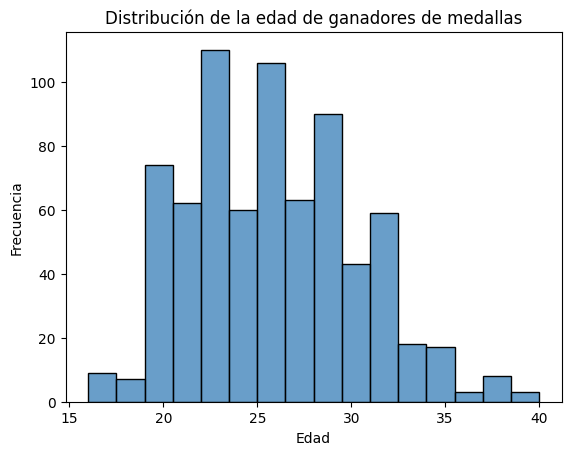

In [16]:
ax = sns.histplot(deportes_dff['Age'], color = "#377eb8")
ax.set(title = 'Distribución de la edad de ganadores de medallas', xlabel = "Edad", ylabel = 'Frecuencia')


## Inciso 3
# Descubre qué equipos nacionales ganaron el mayor número de medallas en los cinco principales deportes en 2016.

Para descubrir esta información, hacemos uso del DataFrame **deportes_dff** y con ayuda de la función `groupby()` agrupamos la información por equipos. Una vez hecho esto, contamos la cantidad de medallas de cada uno con la función `count()`y ordenamos de mayor a menor con `sort_values`.

In [17]:
equipos = deportes_dff.groupby('Team')['Medal'].count().reset_index().sort_values(by='Medal', ascending=False)
print(equipos) #Cantidad total de medallas por equipo nacional


                   Team  Medal
52        United States    127
20              Germany     88
21        Great Britain     69
10               Canada     45
2             Australia     43
33          Netherlands     34
27              Jamaica     30
46               Sweden     21
19               France     20
7                Brazil     19
1             Argentina     18
6               Belgium     18
35              Nigeria     18
11                China     15
28                Japan     15
30                Kenya     13
16              Denmark     12
26                Italy     10
37               Poland      9
34          New Zealand      9
39              Romania      9
44         South Africa      9
24              Hungary      8
18             Ethiopia      8
13              Croatia      6
3               Bahamas      6
40               Russia      4
31            Lithuania      4
36               Norway      4
45                Spain      4
17              Estonia      4
47      

Ahora, trazamos un diagrama de barras para mostrar la cantidad de medallas obtenidas por cada equipo.

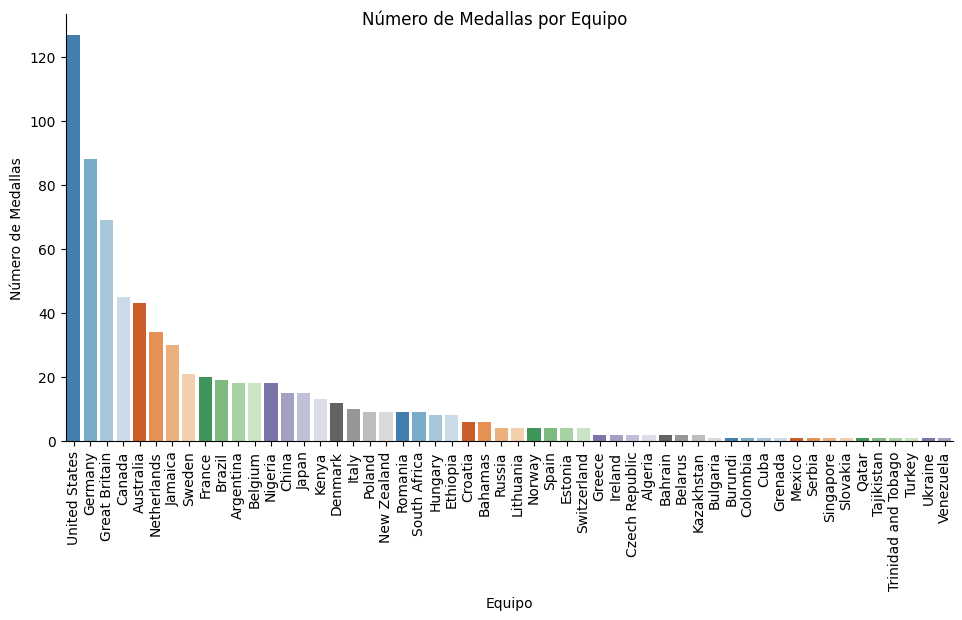

In [18]:
ax = sns.catplot(data=equipos, x="Team", y="Medal", kind="bar", aspect=2, palette = "tab20c"
)

ax.set_axis_labels("Equipo", "Número de Medallas")
ax.fig.suptitle("Número de Medallas por Equipo")
ax.set_xticklabels(rotation=90)



Como valor agregado, se quiso analizar la cantidad de medallas ganadas por cada uno de los mejores cinco equipos en los cinco deportes principales.

Para esto, extraemos las primeras cinco filas de **equipos** para saber cuáles son los mejores cinco.

In [19]:
equipos_5 = equipos.head(5)
print(equipos_5)

             Team  Medal
52  United States    127
20        Germany     88
21  Great Britain     69
10         Canada     45
2       Australia     43


Luego, tomamos nuevamente el DataFrame **deportes_dff** para agrupar por equipo y deporte, y contar así su respectiva cantidad de medallas. Sin embargo, a nosotros nos interesan solo los primeros cinco equipos, por tanto, filtramos **equipos_5f** de tal manera que solo salgan las filas cuyo valor en la columna Team esté también en **equipos_5**.

In [20]:
equipos_5f= deportes_dff.groupby(["Team", "Sport"])["Medal"].count().reset_index(name="Medals")
equipos_df = equipos_5f[equipos_5f['Team'].isin(equipos_5['Team'])]
print(equipos_df)

             Team      Sport  Medals
2       Australia  Athletics       2
3       Australia     Rowing       9
4       Australia   Swimming      32
17         Canada  Athletics      10
18         Canada   Football      18
19         Canada     Rowing       2
20         Canada   Swimming      15
38        Germany  Athletics       3
39        Germany   Football      35
40        Germany     Hockey      33
41        Germany     Rowing      17
42  Great Britain  Athletics      14
43  Great Britain     Hockey      16
44  Great Britain     Rowing      26
45  Great Britain   Swimming      13
90  United States  Athletics      46
91  United States     Rowing      10
92  United States   Swimming      71


Finalmente, graficamos el diagrama de barras compartido.

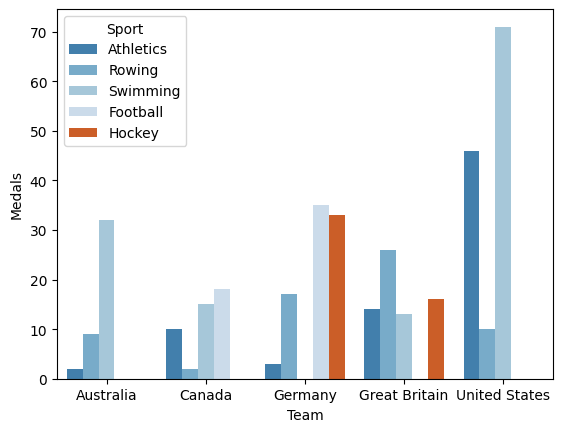

In [21]:
ax = sns.barplot(x = "Team", y = "Medals", hue = 'Sport', data = equipos_df, palette = "tab20c");


## Inciso 4
# Observe la tendencia del peso medio de los atletas masculinos y femeninos ganadores en los cinco principales deportes en 2016

Primeramente, en cada deporte, vamos a separar en un grupo a las personas de sexo Femenino y en otro grupo a las de sexo Masculino, y se calcula el peso total por cada grupo.

In [22]:
sexo = deportes_dff.groupby(["Sex", "Sport"])["Weight"].sum().reset_index(name='Total_Weight')
print(sexo)


  Sex      Sport  Total_Weight
0   F  Athletics        5945.0
1   F   Football        3400.0
2   F     Hockey        3090.0
3   F     Rowing        4306.0
4   F   Swimming        6421.0
5   M  Athletics        7433.0
6   M   Football        3862.0
7   M     Hockey        3919.0
8   M     Rowing        7462.0
9   M   Swimming        7757.0


Finalmente, graficamos el gráfico de barras que muestra el peso medio de los jugadores, clasificados en función del género, que ganaron en los cinco principales deportes en 2016.

[Text(0.5, 0, 'Sexo'),
 Text(0, 0.5, 'Peso total'),
 Text(0.5, 1.0, 'Peso promedio por sexo y deporte')]

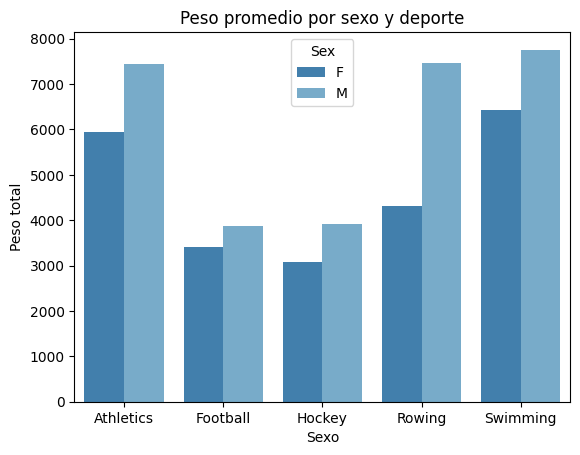

In [24]:
ax = sns.barplot(x = "Sport", y = "Total_Weight", hue = 'Sex', data = sexo, estimator=mean, palette = "tab20c")
ax.set(xlabel = 'Sexo', ylabel = 'Peso total', title = 'Peso promedio por sexo y deporte')